# UCB1
- Alg. keys:
    - epsilon-greedy: small prob. of random exploration
    - Optimistic - more naturally start at large value and fall into true mean
    - UCB - use prob to get upper bound

## UCB = Upper confidence bound
Consider
$$P(sample mean - true mean >= error) <= f(error)$$
which means the prob of my error is bigger than some value is less than a function of error 

Exp.
$$P(sample mean - true mean >= t) <= 1/t$$


## Actual Inequalites
- Markov inequality: RHS, f(error), decreases proportional to 1/t
- Chebyshev inequality: RHS descreases proportional to $1/t^2$
    - RHS decreases faster than Markov
- Hoeffding's inequality
$$P(\bar{X}_n - E(X) \geq t) \leq e^{-2nt^2}$$

It decreases exponentially in $t^2$ <br>
(Extra reading: Finite-time Analysis of the Multiarmed Bandit Problem)


## Pseudocode
Loop: <br>
&nbsp;&nbsp; $j=argmax_{j}(\bar{X}_{n_j} + \sqrt{2\frac{logN}{n_j}})$

<code># pull arm j, update bandit j's mean</code>

- **Still greedy** with respect to this upper bound

## Intuition
- At the begining, not enough data, not confident, the upper bound of CI is large, will explore this bandit to collect data
- After collecting data, estimate is acurate, dont need to explore this bandit, then only case to explore it is that the ture mean is large

## Upper bound
Let $p =e^{-2n_jt^2}$, solve for t:
$$t=\sqrt{\frac{-\log p}{2n_j}}$$
We decide to set:
$$p = N^{-4}$$
where $N = N_1 + ... + N_j$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

class Bandit:
    def __init__(self, p):
        # p is the true win rate of each bandit
        self.p = p
        self.p_estimate = 0
        self.N = 0
    def pull(self):
        return int(np.random.random() < self.p)
    
    def update(self, x):
        # x is the data for the bandit, either 0 or 1
        self.N += 1
        self.p_estimate = x / self.N + (self.N-1) / self.N * self.p_estimate
        

def ucb(mean, n, nj):
    # 2 is a hyperparameter
    return mean + np.sqrt(2*np.log(n) / nj)
    
    
    
def run_experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.zeros(NUM_TRIALS)
    total_plays = 0
    
    # initialization: play each bandit once
    for j in range(len(bandits)):
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)
        
    # Experiment
    for i in range(NUM_TRIALS):
        j = np.argmax([ ucb(b.p_estimate, total_plays, b.N) for b in bandits ] )
        x = bandits[j].pull()
        total_plays +=1 
        bandits[j].update(x)
        
        # for the plot
        rewards[i] = x
    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)
    
    for b in bandits:
        print("mean estimate:{0} (N={1})".format(b.p_estimate, b.N))
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum()/ NUM_TRIALS)
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.xscale('log')
    plt.show()

mean estimate:0.20270270270270266 (N=74)
mean estimate:0.5157894736842109 (N=380)
mean estimate:0.7484253985474439 (N=99549)
total reward earned: 74715.0
overall win rate: 0.74715


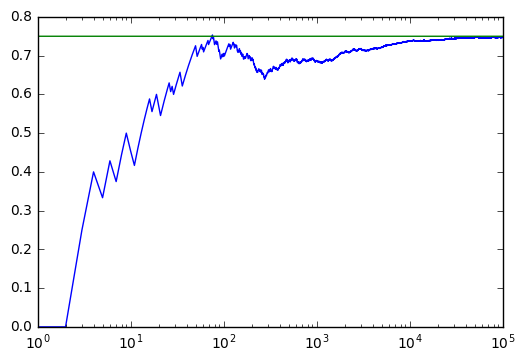

In [34]:
run_experiment()